# Telecom Churn Analysis Model Building

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('telecom_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


In [4]:
df= df.drop('Unnamed: 0', axis=1)

In [5]:
df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0


### Creating x and y variable

In [6]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [7]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

### Splitting the data into train and test data

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## 1. Logistic Regression

In [50]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7967306325515281


In [51]:
lr_pred= lr_model.predict(x_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1039
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



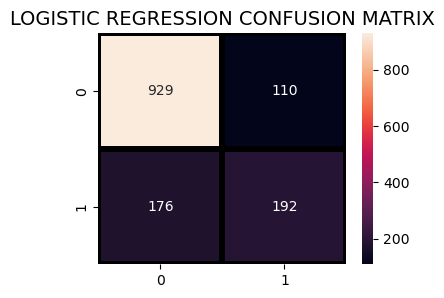

In [52]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

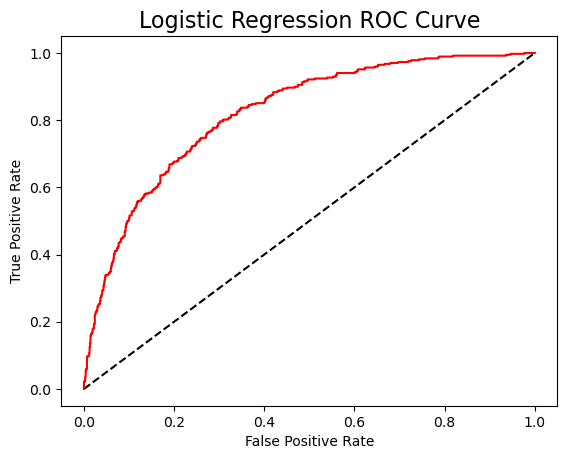

In [53]:
y_pred_prob = lr_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

## 2. KNN

In [46]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7825159914712153


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1039
           1       0.65      0.46      0.54       368

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## 3. Decision Tree Classifier

In [9]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [10]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [11]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
model_dt.score(x_test,y_test)

0.7825159914712153

In [13]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1039
           1       0.60      0.52      0.56       368

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [14]:
print (confusion_matrix(y_test, y_pred))

[[909 130]
 [176 192]]


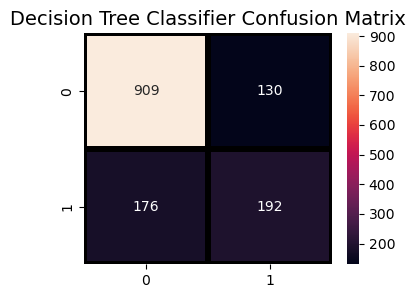

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=14)
plt.show()

###### As we can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

## Adaboost

In [56]:
a_model = AdaBoostClassifier()
a_model.fit(x_train,y_train)
a_preds = a_model.predict(x_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7867803837953091

In [57]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1039
           1       0.60      0.53      0.57       368

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



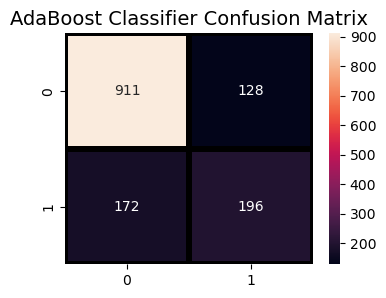

In [58]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

## Gradient Boosting Classifier

In [59]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7974413646055437


In [60]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1039
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



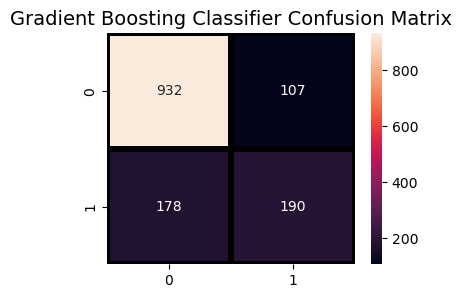

In [61]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

#### Using the above Boosting classifiers we achieve a maximum accuracy of 79.7%

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

#### Using SMOTE ENN

In [16]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [17]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [18]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [19]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9314481576692374
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       550
           1       0.92      0.95      0.94       617

    accuracy                           0.93      1167
   macro avg       0.93      0.93      0.93      1167
weighted avg       0.93      0.93      0.93      1167



In [20]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[498  52]
 [ 28 589]]


###### Now we can see quite better results, i.e. Accuracy: 93 %, and a very good recall, precision & f1 score for minority class.

## 4. Random Forest Classifier

In [21]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [22]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [23]:
y_pred=model_rf.predict(x_test)

In [24]:
model_rf.score(x_test,y_test)

0.7924662402274343

In [25]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1039
           1       0.65      0.46      0.54       368

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



#### Here we can see that there is not a huge difference in accuracy between Decicion Tree Classifier and Random Forest Classifier

#### Using SMOTE ENN

In [31]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [32]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [33]:
model_smote_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [34]:
model_smote_rf.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [35]:
y_pred_smote_rf = model_smote_rf.predict(xr_test)

In [36]:
print(classification_report(yr_test, y_pred_smote_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       543
           1       0.93      0.96      0.95       639

    accuracy                           0.94      1182
   macro avg       0.94      0.94      0.94      1182
weighted avg       0.94      0.94      0.94      1182



In [38]:
print(confusion_matrix(yr_test, y_pred_smote_rf))

[[498  45]
 [ 26 613]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

## 5. PCA

In [40]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train)
xr_test_pca = pca.transform(xr_test)
explained_variance = pca.explained_variance_ratio_

In [41]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [42]:
model.fit(xr_train_pca,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [43]:
yr_predict_pca = model.predict(xr_test_pca)

In [44]:
model_score_r_pca = model.score(xr_test_pca, yr_test)

In [45]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test, yr_predict_pca))

0.7089678510998308
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       543
           1       0.70      0.80      0.75       639

    accuracy                           0.71      1182
   macro avg       0.71      0.70      0.70      1182
weighted avg       0.71      0.71      0.71      1182



##### With PCA, we couldn't see any better results.

# Conclusion
### Our final model we which we are using is Random Forest Classifier with SMOTEENN

# Saving the model
### Pickling the model

In [62]:
import pickle

In [64]:
filename = 'deployment.sav'

In [65]:
pickle.dump(model_smote_rf, open(filename,'wb'))

In [66]:
load_model = pickle.load(open(filename, 'rb'))

In [67]:
load_model.score(xr_test, yr_test)

0.939932318104907